# Descripción del proyecto

La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.
Vamos a identificar patrones que determinen si un juego tiene éxito o no. Esto nos permitirá detectar planificar campañas publicitarias.

hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y  planearemos una campaña para 2017.


El dataset contiene una columna `"rating"` que almacena la **clasificación ESRB** de cada juego. **El Entertainment Software Rating Board** (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Descripción de los datos

- `Name` (Nombre)

- `Platform` (Plataforma)

- `Year_of_Release` (Año de lanzamiento)

- `Genre` (Género) 

- `NA_sales` (ventas en Norteamérica en millones de dólares estadounidenses) 

- `EU_sales` (ventas en Europa en millones de dólares estadounidenses) 

- `JP_sales` (ventas en Japón en millones de dólares estadounidenses) 

- `Other_sales` (ventas en otros países en millones de dólares estadounidenses) 

- `Critic_Score` (máximo de 100) 

- `User_Score` (máximo de 10) 

- `Rating` (ESRB)

# Importamos librerias y cargamos datos

In [115]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


In [12]:
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

# Exploracion inicial de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [11]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Podemos observar en nuestra tabla lo siguiente:

- Existen 16715 filas con  11 columnas, tenemos 6 columnas con valores ausentes y dos columnas  tienen 2 valores ausentes esas podemos eliminar sus valores sin problema

- Hay columnas que tienen su tipo de dato incorrecto podemos corregirlas; `'año de realizacion'` , la cambiaremos a entero. `'crtic_score'`, podemos cambiar el tipo de dato a entero ya que el valos maximo es un 100 entero. `'user_score'`, tambien lo cambiaremos a entero ya que esta en tipo objeto y es un valor numerico su máximo entero es de 10

- Finalmente cambiaremos las columnas a minúsculas

In [13]:
#Calcular el porcentaje de datos ausentes
n_rows = df.shape[0]
100 * df.isna().sum() / n_rows

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [14]:
# Vamos a eliminar las filas que contienen porcentajes bajos de valores ausentes 
df = df.dropna(subset=['Name', 'Year_of_Release', 'Genre'])

In [17]:
df.isna().sum()*100/df.shape[0]

Name                0.000000
Platform            0.000000
Year_of_Release     0.000000
Genre               0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.453418
User_Score         40.166626
Rating             40.598395
dtype: float64

listo más adelante abordaremos las columnas que si tenian un porcentaje alto de valores ausentes!

In [26]:
# Crear un diccionario para mapear nombres de columnas de mayúsculas a minúsculas
mapeo_columnas = {columna: columna.lower() for columna in df.columns}

In [27]:
# Renombrar las columnas utilizando el método rename
df = df.rename(columns=mapeo_columnas)

In [28]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

listo quedaron las columnas en minúsculas

## Observaremos los valores únicos de cada columna en búsqueda de anormalidades

**platform**

In [46]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**year_of_release**

In [29]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

**genre**

In [47]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**user_score**

In [30]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Vamos a cambiar los valores **'tbd'** por **'nan** y el tipo object a tipo float!

In [31]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [37]:
# Convertir la columna 'user_score' a float
df['user_score'] = df['user_score'].astype(float)


In [38]:
 df['user_score'].dtype

dtype('float64')

In [39]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

**rating**

In [48]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

## Valores duplicados

In [17]:
df.duplicated().sum()

0

## Análisis de Ventas

crearemos una nueva caracteristica `total_sales` sumando las ventas por región

In [51]:
#Vamos a sumar las ventas de todas las regiones y poner las ventas totales por juego en una columna separada
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [52]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [58]:
#tabla de las 3 plataformas con el mayor número de ventas
df.groupby('platform')['total_sales'].sum().nlargest(3).reset_index()

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34


Play station 2 reporto el mayor número de ventas en todo del mundo!!

In [76]:
#Las tres peores en ventas
df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=True).head(3)

,platform,total_sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10


Crearemos otra columna llamada `lifetime`  donde veremos el tiempo de vida por plataformna y luego por juego desde el año de realización del mismo

In [118]:
# Tiempo de vida desde que fue hecho el juego
year_today = datetime.now().year
df['lifetime'] = year_today - df['year_of_release']

In [120]:
year_today

2024

In [141]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,lifetime
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,18
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,39
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,16
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,15
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,28
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,35
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,18
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,18
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,15
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31,40


In [150]:
# Ordenar por 'lifetime' en orden descendente y seleccionar las 10 primeras filas 
top_10_lifetime = df.nlargest(10, 'lifetime')
top_10_lifetime

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,lifetime
262,Asteroids,2600,1980,Shooter,4.00,0.26,0.0,0.05,NaN,NaN,NaN,4.31,44
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN,2.76,44
1764,Kaboom!,2600,1980,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN,1.15,44
1968,Defender,2600,1980,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN,1.05,44
2650,Boxing,2600,1980,Fighting,0.72,0.04,0.0,0.01,NaN,NaN,NaN,0.77,44
4019,Ice Hockey,2600,1980,Sports,0.46,0.03,0.0,0.01,NaN,NaN,NaN,0.50,44
5360,Freeway,2600,1980,Action,0.32,0.02,0.0,0.00,NaN,NaN,NaN,0.34,44
6300,Bridge,2600,1980,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN,0.27,44
6875,Checkers,2600,1980,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN,0.23,44
240,Pitfall!,2600,1981,Platform,4.21,0.24,0.0,0.05,NaN,NaN,NaN,4.50,43


Todas son de la misma plataforma '2600' lanzado en 1980 lleva 44 años y contando

crearemos una grafica para ver los juegos lanzados por año

In [151]:
# Contar la cantidad de juegos lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()


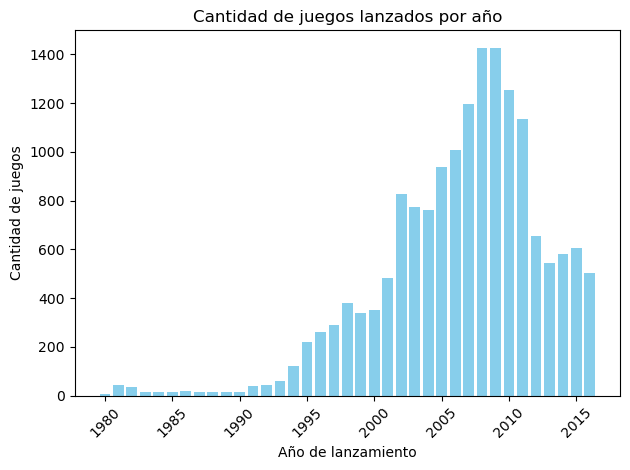

In [152]:
# Crear el gráfico de barras
plt.bar(games_per_year.index, games_per_year.values, color='skyblue')
# Configurar título y etiquetas de los ejes
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


podemos ver que en el año 2008 y 2009 la cantidada de juegos creados ha sido mayor aprox 1400


### Nuevo dataframe filtrado de 5 años de interes

<!-- Crearemos un filtro de un periodo de interes, de 5 años atrás del año máximo de realización `'year_of_release'  
Nos servira para hacer los analisis de aqui en adelante

In [165]:
# Calcular el año máximo de lanzamiento en el DataFrame
año_maximo = df['year_of_release'].max()

In [166]:
año_maximo

2016

In [167]:
# Calcular el límite inferior del período de interés (cinco años atrás del año máximo)
limite_inferior = año_maximo - 5
limite_inferior

2011

In [168]:
# DataFrame para conservar solo las filas dentro del período de interés
df_filtrado = df[df['year_of_release'] >= limite_inferior]

In [170]:
df_filtrado.reset_index(drop=True, inplace=True)
df_filtrado.shape



(4022, 13)

### Diagrama de caja de `total_sales` de juegos por plataforma

<Figure size 2500x4000 with 0 Axes>

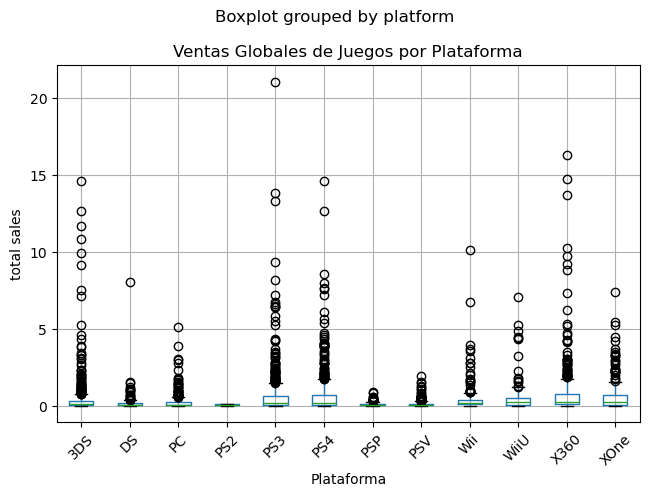

In [171]:
# Crear el diagrama de caja
plt.figure(figsize=(25,40))
df_filtrado.boxplot(column='total_sales', by='platform')
plt.tight_layout()
plt.title('Ventas Globales de Juegos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('total sales')
plt.xticks(rotation=45)

plt.show()

el ps3 tanto el ps4 llevan ventaja pero el 3ds tiene algunos valores atipicos impórtantes en cuanto a ventas

###  Graficos de dispersión

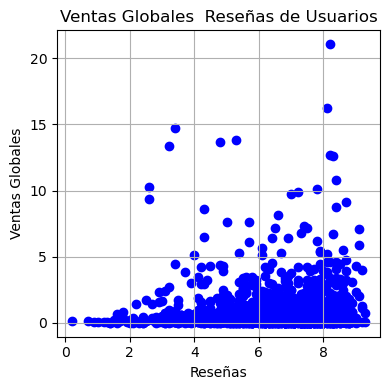

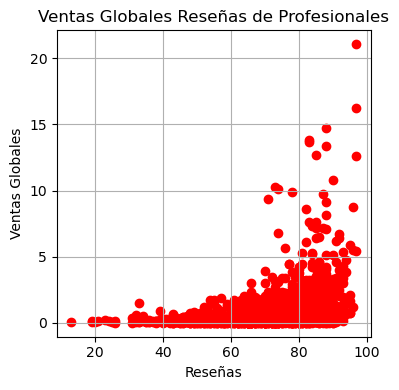

Correlación entre reseñas de usuarios y ventas: 0.031636127725592864
Correlación entre reseñas de profesionales y ventas: 0.32997650501145864


In [195]:
# Crear el gráfico de dispersión
plt.figure(figsize=(4, 4))
plt.title('Ventas Globales  Reseñas de Usuarios')
plt.scatter(df_filtrado['user_score'], df_filtrado['total_sales'], color='blue', label='Reseñas de Usuarios')
plt.xlabel('Reseñas')
plt.ylabel('Ventas Globales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Crear el gráfico de dispersión
plt.figure(figsize=(4, 4))
plt.title('Ventas Globales Reseñas de Profesionales')
plt.scatter(df_filtrado['critic_score'], df_filtrado['total_sales'], color='red', label='Reseñas de Profesionales')
plt.xlabel('Reseñas')
plt.ylabel('Ventas Globales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Calcular correlación entre las reseñas y las ventas
correlation_user = df_filtrado['user_score'].corr(df_filtrado['total_sales'])
correlation_critic = df_filtrado['critic_score'].corr(df_filtrado['total_sales'])

# Mostrar la correlación
print(f"Correlación entre reseñas de usuarios y ventas: {correlation_user}")
print(f"Correlación entre reseñas de profesionales y ventas: {correlation_critic}")



hay una correlacion en ambas cercana a 0 por lo cual es debil y no hay correlacion entre las reseñas y las ventas!

### Ventas por Genero

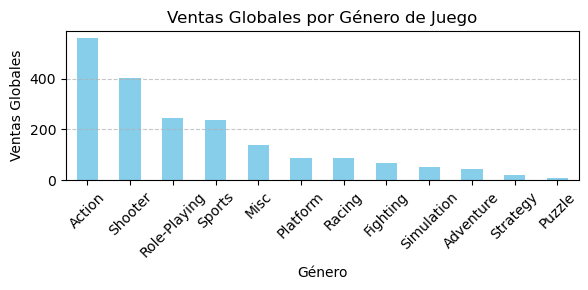

In [179]:
# Calcular las ventas totales por género
sales_by_genre = df_filtrado.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizar la distribución de las ventas por género
plt.figure(figsize=(6, 3))
sales_by_genre.plot(kind='bar', color='skyblue')
plt.title('Ventas Globales por Género de Juego')
plt.xlabel('Género')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [183]:
# Identificar los géneros más rentables
print("Géneros más rentables:")
print(sales_by_genre.head(3))

# Identificar los géneros menos rentables
print("\nGéneros menos rentables:")
print(sales_by_genre.tail(3))

Géneros más rentables:
genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Name: total_sales, dtype: float64

Géneros menos rentables:
genre
Adventure    45.04
Strategy     22.16
Puzzle        9.85
Name: total_sales, dtype: float64


Podemos ver que los juegos más rentables son:
- ACCION 
- DE DISPAROS
- JUEGO DE ROL 

y los menos rentables:
- Aventura
- Estrategia
- rompecabezas

### Graficas de ventas globales de cada region y por plataforma las mejores 5

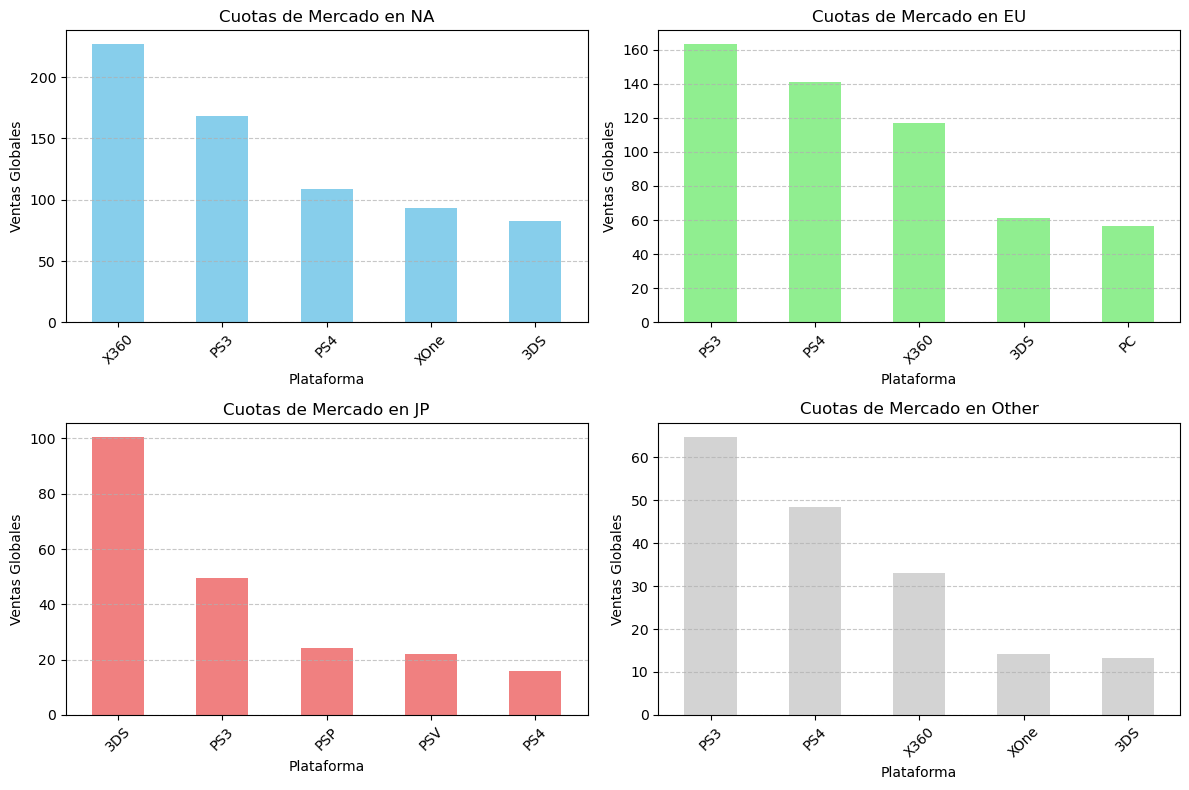

In [184]:
# Calcular las ventas totales por plataforma para cada región
sales_by_platform = df_filtrado.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Obtener las cinco plataformas principales por región
top_platforms_na = sales_by_platform['na_sales'].nlargest(5)
top_platforms_eu = sales_by_platform['eu_sales'].nlargest(5)
top_platforms_jp = sales_by_platform['jp_sales'].nlargest(5)
top_platforms_other = sales_by_platform['other_sales'].nlargest(5)

# Visualizar las cuotas de mercado por región y plataforma
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
top_platforms_na.plot(kind='bar', color='skyblue')
plt.title('Cuotas de Mercado en NA')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
top_platforms_eu.plot(kind='bar', color='lightgreen')
plt.title('Cuotas de Mercado en EU')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 3)
top_platforms_jp.plot(kind='bar', color='lightcoral')
plt.title('Cuotas de Mercado en JP')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 4)
top_platforms_other.plot(kind='bar', color='lightgrey')
plt.title('Cuotas de Mercado en Other')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Norte America** la plataforma con mayor numero de ventas el X360
- **Japón**  la plataforma con mayor numero de ventas el 3DS 
- **Europa y resto del mundo** con mayor numero de ventas fue el PS3!!

### Los 5 generos principales en ventas

In [190]:
# Identificar los cinco géneros principales
top_genres = sales_by_genre.nlargest(5)

In [188]:
top_genres.reset_index()

,genre,total_sales
0,Action,557.80
1,Shooter,402.91
2,Role-Playing,245.63
3,Sports,237.15
4,Misc,139.42


### Explorar el impacto de las clasificaciones de ESRB en las ventas por región:

<Figure size 1200x800 with 0 Axes>

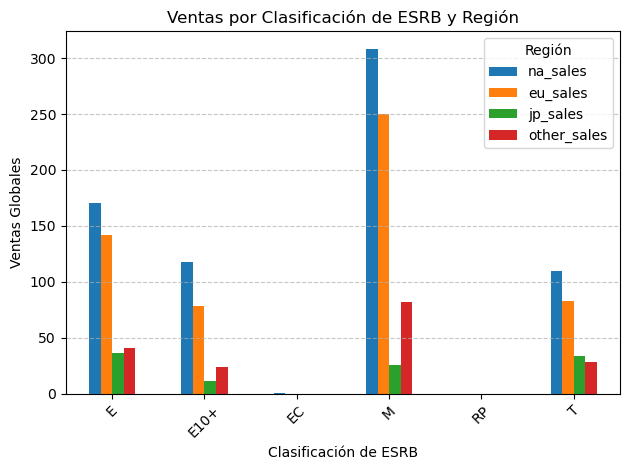

In [162]:
# Agrupar los datos por clasificación de ESRB y región, y calcular las ventas totales
sales_by_esrb_region = df_filtrado.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Visualizar las ventas por clasificación de ESRB y región
plt.figure(figsize=(12, 8))
sales_by_esrb_region.plot(kind='bar')
plt.title('Ventas por Clasificación de ESRB y Región')
plt.xlabel('Clasificación de ESRB')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Región')
plt.tight_layout()
plt.show()



podemos ver que la clasificación ESRB si afecta por región Mature reporta el mayor numero de ventas en norte america europa y en los demás paises del mundo!! con excepción de japón que en Everyone es donde reporta más ventas! 

# Hipotesis

**Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

-Hipótesis nula (H0): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.

-Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

**Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

-Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

-Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

     Vamos a suponer un valor de umbral alfa de 0.05, que es un valor comúnmente aceptado en la literatura estadística.

**Criterio para probar las hipótesis:**

Utilizaremos la Prueba t de Student para comparar las calificaciones promedio entre dos grupos (Hipótesis 1) y la Prueba ANOVA para comparar las calificaciones promedio entre más de dos grupos (Hipótesis 2).
Luego, compararemos el valor p resultante con el valor de alfa para determinar si rechazamos o no la hipótesis nula.

**Hipótesis 1:**

In [191]:
# Filtrar las calificaciones de los usuarios para Xbox One y PC
user_ratings_xbox_one = df_filtrado[df_filtrado['platform'] == 'Xbox One']['user_score']
user_ratings_pc = df_filtrado[df_filtrado['platform'] == 'PC']['user_score']

# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(user_ratings_xbox_one, user_ratings_pc)

# Comparar el valor p con el valor de alfa
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.")

No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.


**Hipótesis 2:**

In [192]:
# Filtrar las calificaciones de los usuarios para los géneros de Acción y Deportes
user_ratings_action = df_filtrado[df_filtrado['genre'] == 'Acción']['user_score']
user_ratings_sports = df_filtrado[df_filtrado['genre'] == 'Deportes']['user_score']

# Realizar la prueba t de Student para comparar dos grupos
t_stat, p_value = stats.ttest_ind(user_ratings_action, user_ratings_sports)

# Comparar el valor p con el valor de alfa
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")

No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


# Conclusion General


Podemos ver que las calificaciones promedio de los usuarios para Xbox One y PC son iguales y que Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes tambien son iguales!!!